## Engineering Rare Categories

Rare values are categories within a categorical variable that are present only in a small percentage of the observations. There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5 % can be considered rare.

As we discussed, Infrequent labels are so few, that it is hard to derive reliable information from them. But more importantly, if you remember from section 3, infrequent labels tend to appear only on train set or only on the test set:

- If only on the train set, they may cause over-fitting
- If only on the test set, our machine learning model will not know how to score them

Therefore, to avoid this behaviour, we tend to group those into a new category called 'Rare' or 'Other'.

Rare labels can appear in low or highly cardinal variables. There is no rule of thumb to determine how many different labels are considered high cardinality. It depend as well on how many observations there are in the dataset. In a dataset with 1,000 observations, 100 labels may seem a lot, whereas in a dataset with 100,000 observations it may not be so high.

Highly cardinal variables tend to have many infrequent or rare categories, whereas low cardinal variables, may have only 1 or 2 rare labels.

### Note the following:

**Note that grouping infrequent labels or categories under a new category called 'Rare' or 'Other' is the common practice in machine learning for business.**

- Grouping categories into rare for variables that show low cardinality may or may not improve model performance, however, we tend to re-group them into a new category to smooth model deployment.

- Grouping categories into rare for variables with high cardinality, tends to improve model performance as well.


## In this assignment:

You have to to re-group rare labels under a new category called rare, and compare the implications of this encoding in variables with:

- One predominant category
- A small number of categories
- High cardinality

For this assignment, we will use the House Sale dataset. We will re-group variables using pandas an feature-engine.

In [18]:
pip install feature_engine

     |████████████████████████████████| 153kB 31.5MB/s 
     |████████████████████████████████| 9.5MB 27.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None) # to display the total number columns present in the dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving houseprice.csv to houseprice.csv


## House Sale Price dataset

In [5]:
# let's load the house price dataset

data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Important

The identification of rare labels should be done using only the training set, and then propagated to the test set. Rare labels should be identified in the training set only. In practice, what we will do is identify **non-rare labels**, and then any other label, either in the train or the test or future live data that is not in that list of **non-rare** labels, will be re=grouped into the new category.

For example, let's imagine that we have in the training set the variable 'city' with the labels 'London', 'Manchester' and 'Yorkshire'. 'Yorkshire' is present in less than 5% of the observations so we decide to re-group it in a new category called 'Rare'.

In the test set, we should also replace 'Yorkshire' by 'Rare', regardless of the percentage of observations for 'Yorkshire' in the test set. In addition, if in the test set we find the category 'Milton Keynes', that was not present in the training set, we should also replace that category by 'Rare'. On other words, all categories present in test set, not present in the list of **non-rare** categories derived from the training set, should be treated as rare values and re-grouped into 'Rare'.

In [6]:
# let's divide into train and test set

X_train,X_test,Y_train,Y_test=train_test_split(data.loc[:,data.columns!='SalePrice'],data.loc[:,data.columns=='SalePrice'],test_size=0.3)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

## Variables with one dominant category

In [7]:
# let's explore a few examples in which variables have only a few categories, say less than 3

for i in X_train:
    if len(X_train[i].value_counts())<3:
        print(i)
        print(X_train[i].value_counts(normalize=True))
        print()
        

Street
Pave    0.995108
Grvl    0.004892
Name: Street, dtype: float64

Alley
Grvl    0.542373
Pave    0.457627
Name: Alley, dtype: float64

Utilities
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64

CentralAir
Y    0.931507
N    0.068493
Name: CentralAir, dtype: float64

BsmtHalfBath
0    0.947162
1    0.052838
Name: BsmtHalfBath, dtype: float64



### Conclusion

The 3 variables above, Street, Utilities and CentralAir, show one dominating category which accounts for more than 93-99% of the observations. Re-grouping the rare label in this situation does not make any sense. We could determine if these variables are useful with exploratory analysis, or any feature selection algorithm, or drop the variables altogether.

## Variables with few categories

In [8]:
# the columns in the below list have only 4 different labels; consider cols = ['MasVnrType', 'ExterQual', 'BsmtCond']

for i in X_train:
    if i in ['MasVnrType', 'ExterQual', 'BsmtCond']:
        print(i)
        print(X_train[i].value_counts(normalize=True))
        print()

MasVnrType
None       0.598820
BrkFace    0.304818
Stone      0.087512
BrkCmn     0.008850
Name: MasVnrType, dtype: float64

ExterQual
TA    0.628180
Gd    0.327789
Ex    0.034247
Fa    0.009785
Name: ExterQual, dtype: float64

BsmtCond
TA    0.924471
Gd    0.040282
Fa    0.033233
Po    0.002014
Name: BsmtCond, dtype: float64



The variables above have only 4 categories, and in all three cases, there is at least one category that is infrequent, that is, that is present in less than 5% of the observations.

When the variable has only a few categories, then perhaps it makes no sense to re-categorise the rare labels into something else.

For example the first variable MasVnrType shows only 1 rare label, BrkCmn. Thus, re-categorising it into a new label will leave the variable in the same situation.

The second variable ExterQual, contains 2 rare labels Ex and Fa, we could group these 2 into a new label called 'Rare'.

The third variable BsmtCond contains 3 rare labels, Fa, Gd and Po, so we could group these 3 under the new label 'Rare'.

## Variable with high cardinality

In [9]:
# let's explore examples in which variables have several categories, say more than 10

for i in X_train:
    if len(X_train[i].unique())>10:
        print(i)
        print(X_train[i].value_counts(normalize=True))
        print()

Id
1460    0.000978
495     0.000978
511     0.000978
509     0.000978
508     0.000978
          ...   
969     0.000978
968     0.000978
967     0.000978
966     0.000978
1       0.000978
Name: Id, Length: 1022, dtype: float64

MSSubClass
20     0.367906
60     0.204501
50     0.107632
120    0.054795
30     0.044031
160    0.043053
70     0.040117
90     0.039139
80     0.037182
190    0.021526
85     0.013699
45     0.008806
180    0.007828
75     0.006849
40     0.002935
Name: MSSubClass, dtype: float64

LotFrontage
60.0     0.114150
70.0     0.065398
80.0     0.057075
50.0     0.051130
75.0     0.045184
           ...   
39.0     0.001189
140.0    0.001189
114.0    0.001189
168.0    0.001189
112.0    0.001189
Name: LotFrontage, Length: 105, dtype: float64

LotArea
7200     0.018591
9600     0.015656
6000     0.010763
9000     0.008806
10800    0.007828
           ...   
5436     0.000978
9531     0.000978
13101    0.000978
9525     0.000978
9245     0.000978
Name: LotArea, Length

We can see that many categories are rare in the 3 categorical variables printed above.

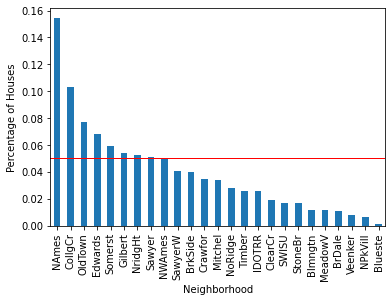

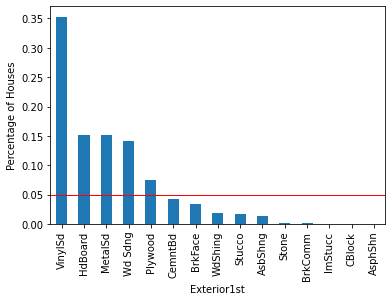

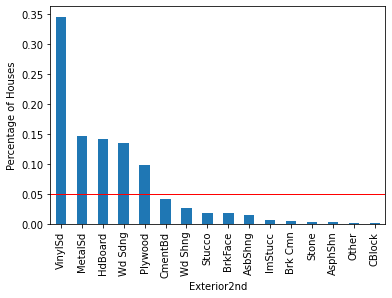

In [20]:


# make plot with the above percentages
fig = plt.figure()
data.groupby('Neighborhood').size().sort_values(ascending=False).div(len(data)).plot.bar(ylabel='Percentage of Houses')
plt.axhline(y=0.05,linewidth=1, color='red')
plt.show()
data.groupby('Exterior1st').size().sort_values(ascending=False).div(len(data)).plot.bar(ylabel='Percentage of Houses')
plt.axhline(y=0.05,linewidth=1, color='red')
plt.show()
data.groupby('Exterior2nd').size().sort_values(ascending=False).div(len(data)).plot.bar(ylabel='Percentage of Houses')
plt.axhline(y=0.05,linewidth=1, color='red')
plt.show()


# add a line at 5 % to flag the threshold for rare categories


## Re-grouping rare labels with pandas

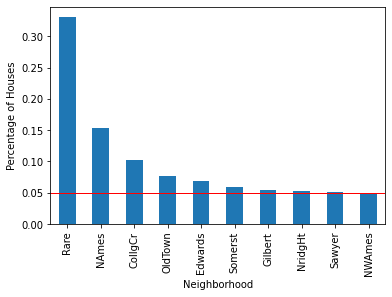

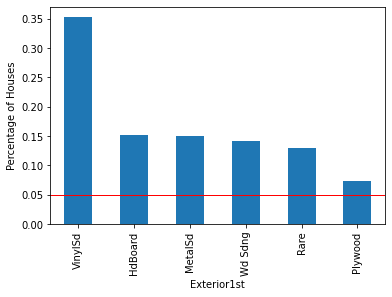

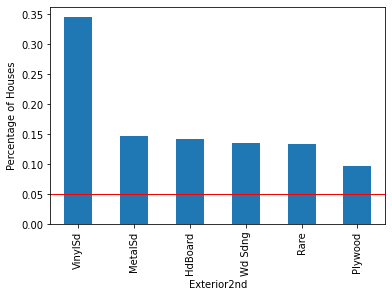

In [21]:
data['Neighborhood']=data['Neighborhood'].mask(data['Neighborhood'].map(data['Neighborhood'].value_counts(normalize=True)) < 0.05, 'Rare')
data['Exterior1st']=data['Exterior1st'].mask(data['Exterior1st'].map(data['Exterior1st'].value_counts(normalize=True)) < 0.05, 'Rare')
data['Exterior2nd']=data['Exterior2nd'].mask(data['Exterior2nd'].map(data['Exterior2nd'].value_counts(normalize=True)) < 0.05, 'Rare')

# make plot with the above percentages

fig = plt.figure()
data.groupby('Neighborhood').size().sort_values(ascending=False).div(len(data)).plot.bar(ylabel='Percentage of Houses')
plt.axhline(y=0.05,linewidth=1, color='red')
plt.show()
data.groupby('Exterior1st').size().sort_values(ascending=False).div(len(data)).plot.bar(ylabel='Percentage of Houses')
plt.axhline(y=0.05,linewidth=1, color='red')
plt.show()
data.groupby('Exterior2nd').size().sort_values(ascending=False).div(len(data)).plot.bar(ylabel='Percentage of Houses')
plt.axhline(y=0.05,linewidth=1, color='red')
plt.show()
# add a line at 5 % to flag the threshold for rare categories


## Use Feature Engine for achieving the same

In [22]:
from feature_engine.encoding import RareLabelEncoder

In [23]:
data = pd.read_csv('houseprice.csv')

In [24]:
# Use Rare value encoder

X_train,X_test,Y_train,Y_test=train_test_split(data.loc[:,data.columns!='SalePrice'],data.loc[:,data.columns=='SalePrice'],test_size=0.3)

X_train.shape, X_test.shape


((1022, 80), (438, 80))

In [25]:

rle=RareLabelEncoder(tol=0.05,n_categories=0,max_n_categories=3,replace_with='Rare')
for i in X_train:
    X_train[i].fillna(X_train[i].mode()[0],inplace=True)
    

In [26]:
rle.fit_transform(X_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
762,763,60,Rare,72.0,8640,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,7,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Rare,GLQ,24,Unf,0,732,756,GasA,Ex,Y,SBrkr,764,783,0,1547,0,0,2,1,3,1,Gd,7,Typ,0,Gd,Attchd,2009.0,Unf,2,614,TA,TA,Y,169,45,0,0,0,0,Ex,MnPrv,Shed,0,6,2010,Rare,Normal
365,366,70,RM,59.0,10690,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,5,7,1920,1997,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Rare,No,Rare,456,Unf,0,216,672,GasA,Gd,Y,FuseA,672,672,0,1344,0,0,1,0,3,1,TA,6,Typ,0,Gd,Detchd,1964.0,Unf,1,468,TA,Rare,Y,0,128,218,0,0,0,Ex,MnPrv,Shed,0,7,2009,WD,Normal
1312,1313,60,RL,60.0,9572,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,8,5,1990,1990,Gable,CompShg,Rare,Rare,BrkFace,336.0,Gd,TA,PConc,Ex,TA,No,GLQ,482,Unf,0,971,1453,GasA,Ex,Y,SBrkr,1453,1357,0,2810,0,0,2,1,4,1,Gd,9,Typ,1,Rare,Attchd,1990.0,RFn,2,750,Rare,Rare,Y,500,0,0,0,0,0,Ex,MnPrv,Shed,0,6,2007,WD,Normal
650,651,60,Rare,65.0,8125,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,Rare,Rare,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,Gd,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Shed,0,5,2008,WD,Normal
114,115,70,RL,61.0,7259,Pave,Grvl,IR1,Lvl,AllPub,Inside,Mod,Rare,Norm,Norm,1Fam,2Story,6,8,1945,2002,Rare,CompShg,Rare,Rare,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,774,Rare,150,104,1028,GasA,Ex,Y,SBrkr,1436,884,0,2320,1,0,2,1,3,1,Gd,9,Typ,1,TA,Detchd,1945.0,Unf,1,180,TA,TA,Y,224,0,0,0,0,0,Ex,MnPrv,Shed,0,7,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,60,RL,90.0,11700,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,2Story,6,6,1968,1968,Rare,CompShg,HdBoard,Rare,BrkFace,365.0,Gd,TA,CBlock,TA,TA,No,ALQ,384,Rare,175,143,702,GasA,Gd,Y,SBrkr,1041,702,0,1743,0,1,1,2,3,1,TA,7,Typ,1,Gd,Attchd,1968.0,Unf,2,539,TA,TA,Y,224,0,0,0,0,0,Ex,MnPrv,Shed,0,6,2007,WD,Normal
369,370,20,RL,60.0,9830,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,2006,Gable,CompShg,Rare,Rare,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,72,Rare,258,733,1063,GasA,Ex,Y,SBrkr,1287,0,0,1287,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1997.0,Fin,2,576,TA,TA,Y,364,17,0,0,182,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
510,511,20,RL,75.0,14559,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1951,2000,Hip,CompShg,Rare,Rare,Rare,70.0,Gd,TA,CBlock,TA,TA,No,Rare,650,Rare,180,178,1008,GasA,Ex,Y,SBrkr,1363,0,0,1363,1,0,1,0,2,1,TA,6,Rare,2,TA,Rare,1951.0,Unf,1,288,TA,TA,Y,324,42,0,0,168,0,Ex,MnPrv,Shed,2000,6,2009,WD,Normal
45,46,120,RL,61.0,7658,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Rare,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,Ex,Y,SBrkr,1752,0,0,1752,1,0,2,0,2,1,Ex,6,Typ,1,Gd,Attc